# **SpaceX  Falcon 9 First Stage Landing Prediction**


## 5 - Data Visualization

## Objectives

Perform exploratory Data Analysis and Feature Engineering using 'Pandas' and 'Matplotlib'

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


Continue analysis on 'dataset_part_2.csv' saved from '3_DataWrangling.ipynb'

In [22]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


FlightNumber is indicating the continuous launch attempts \
\
By plotting out the FlightNumber vs. PayloadMass and overlay the outcome of the launch, I see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

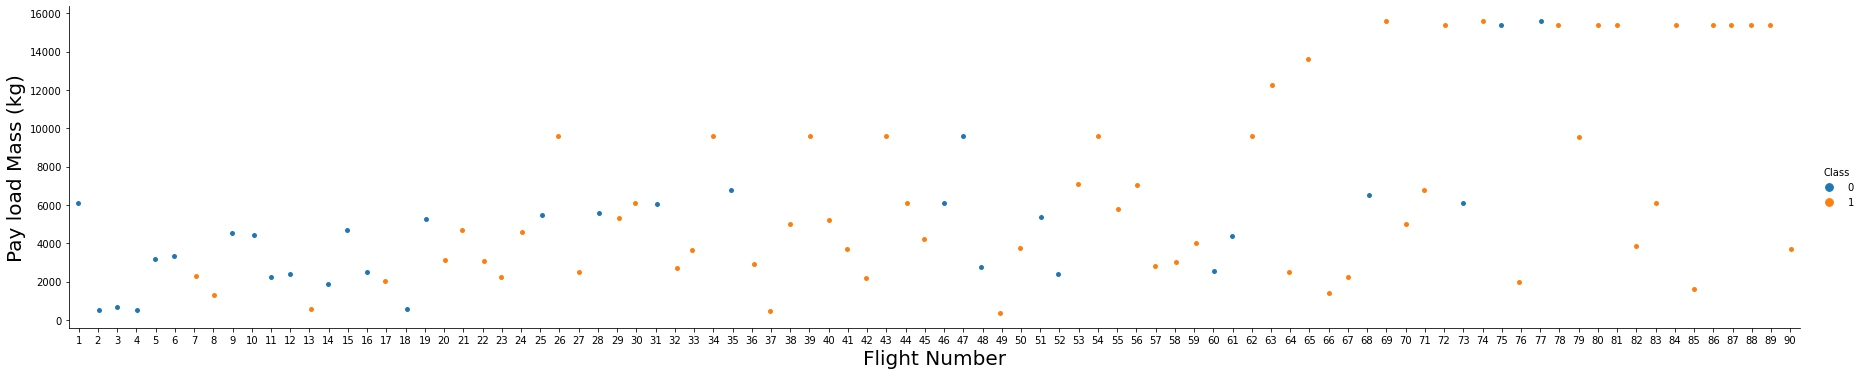

In [23]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Different launch sites have different success rates.'CCAFS LC-40' has a success rate of 60 %, while 'KSC LC-39A' and 'VAFB SLC 4E' has a success rate of 77%.

### Visualize the relationship between Flight Number and Launch Site

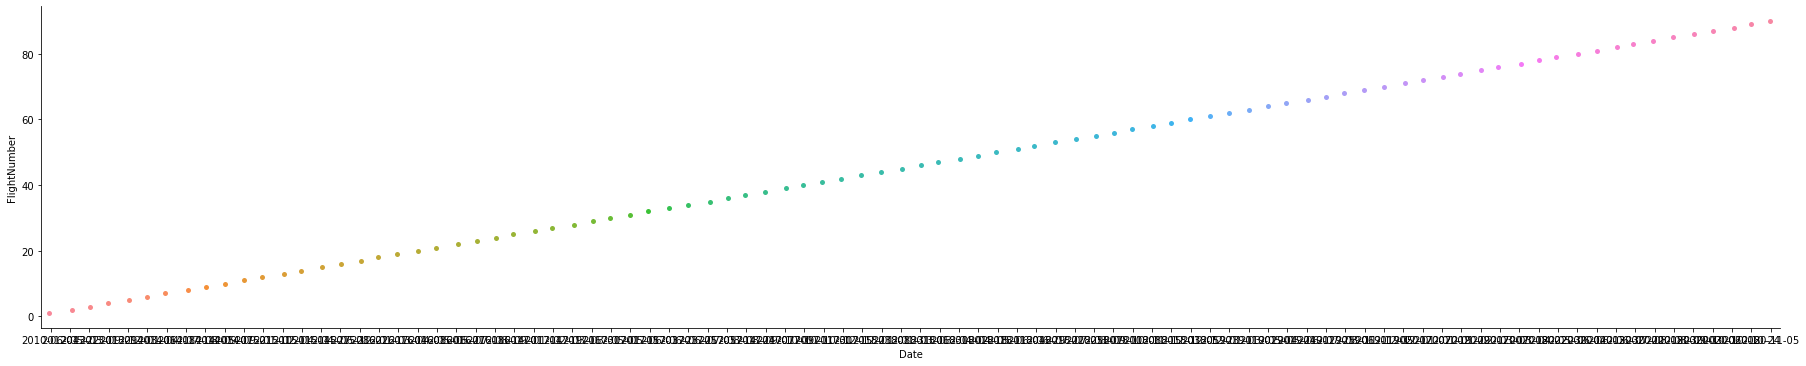

In [24]:
sns.catplot(y="FlightNumber", x="Date", data=df, aspect = 5)

In [25]:
df_gro = df[['FlightNumber', 'LaunchSite', 'Class']]
df_gro.groupby(['LaunchSite']).mean()

,FlightNumber,Class
LaunchSite,,
CCAFS SLC 40,43.818182,0.600000
KSC LC 39A,51.772727,0.772727
VAFB SLC 4E,42.000000,0.769231


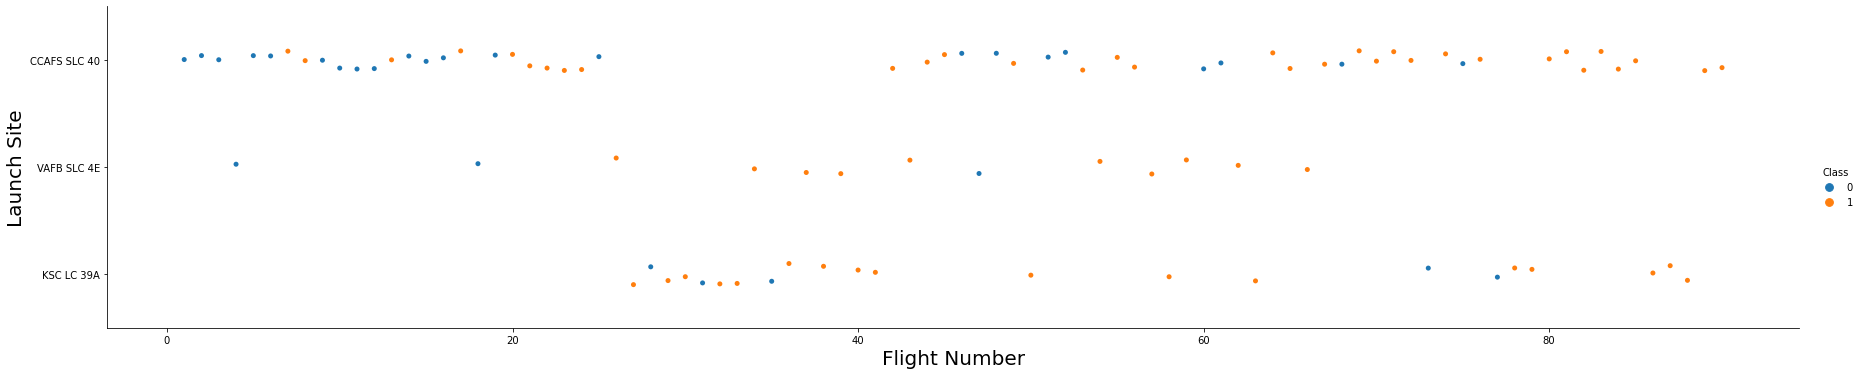

In [26]:
# Plotting a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

The flight number is organized in ascending order according to the launch date

- Most of the launches happened from CCAFS SLC 40 and KSC LC 39A has the least number of fights;
- Across the three sites, higher flight number presented higher likelihood of successful land;
- CCAFS SLC 40 has most of the small and large flight numbers, VAFB SLC 4E concentrates between 35 and 70.  

### Visualize the relationship between Payload and Launch Site

In [27]:
df_pl = df[['PayloadMass', 'LaunchSite', 'Class']]
df_pl.groupby(['LaunchSite']).mean()

,PayloadMass,Class
LaunchSite,,
CCAFS SLC 40,5548.207786,0.600000
KSC LC 39A,7606.450856,0.772727
VAFB SLC 4E,5919.461538,0.769231


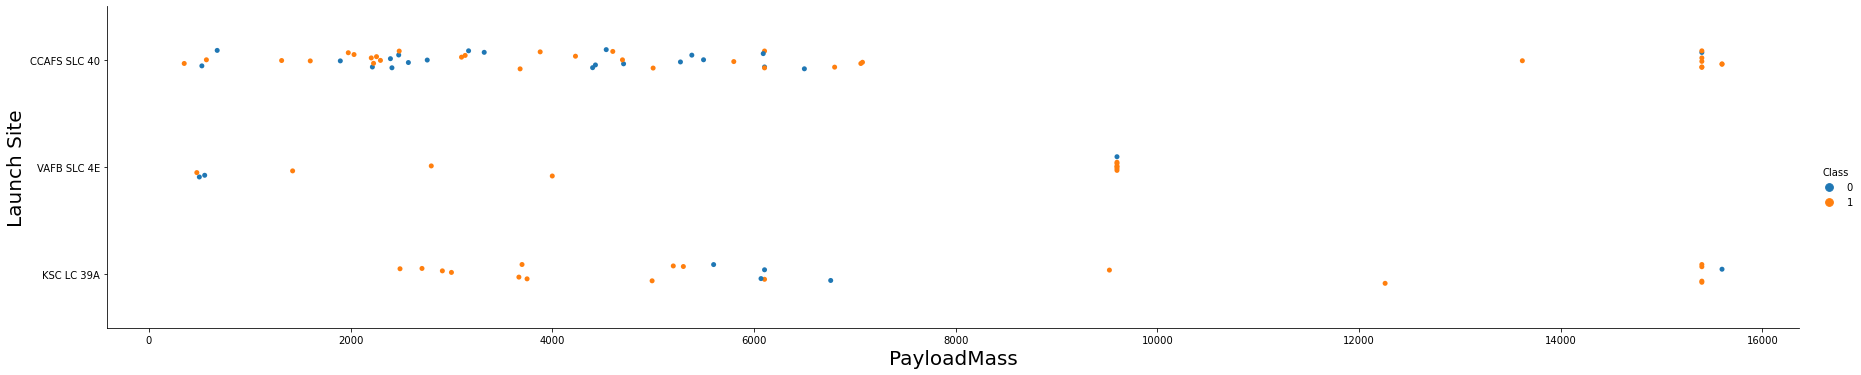

In [28]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Most of the launches from all sites has lower payload mass;
The higher payload mass, from all sites, were more likely to have a successful land;
From KSC, launches between 5000 kg and 7000 kg were less likely to succeed;
Overall, payloads higher than 7000kg seem to be more likely to successfully land. 

### Visualize the relationship between success rate of each orbit type

<AxesSubplot:title={'center':'Sucess rate by orbit type'}, xlabel='orbit', ylabel='sucess rate'>

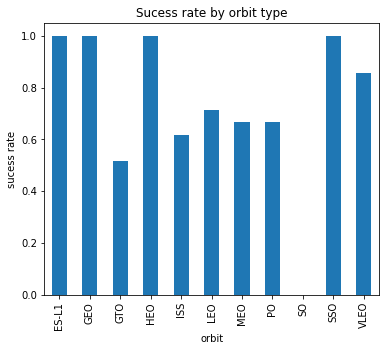

In [29]:
orb_grop = df.groupby('Orbit')['Class'].mean()
orb_grop.plot(kind='bar', title='Sucess rate by orbit type', ylabel='sucess rate',
         xlabel='orbit', figsize=(6, 5))

ES-L1, GEO and SSO seem to be associated with the highest success rates.

### Visualize the relationship between FlightNumber and Orbit type

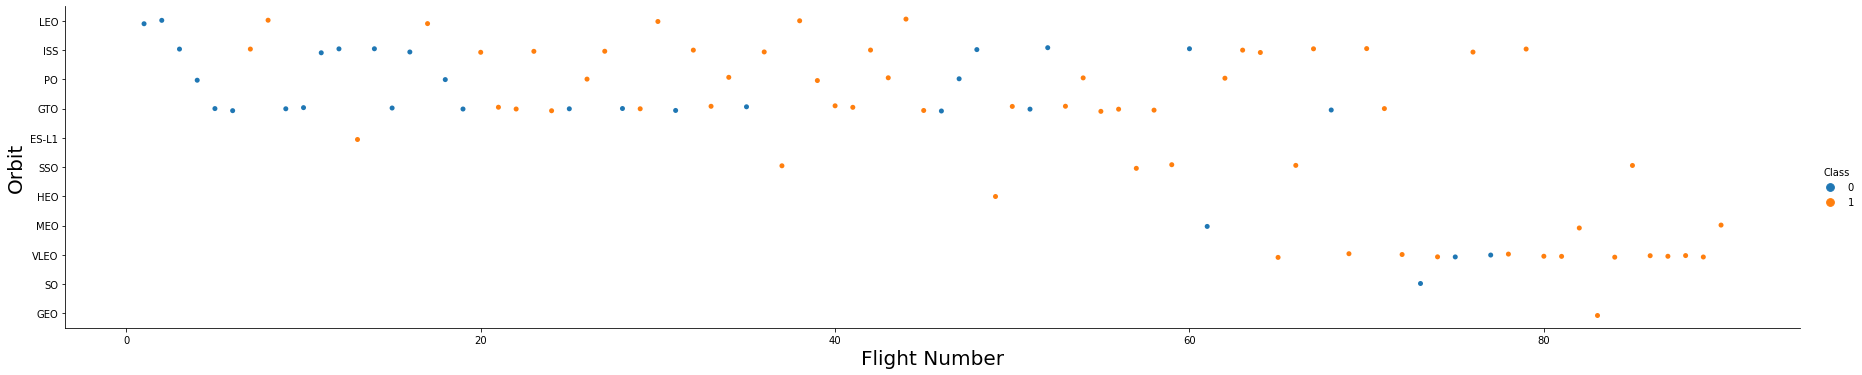

In [30]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualize the relationship between Payload and Orbit type

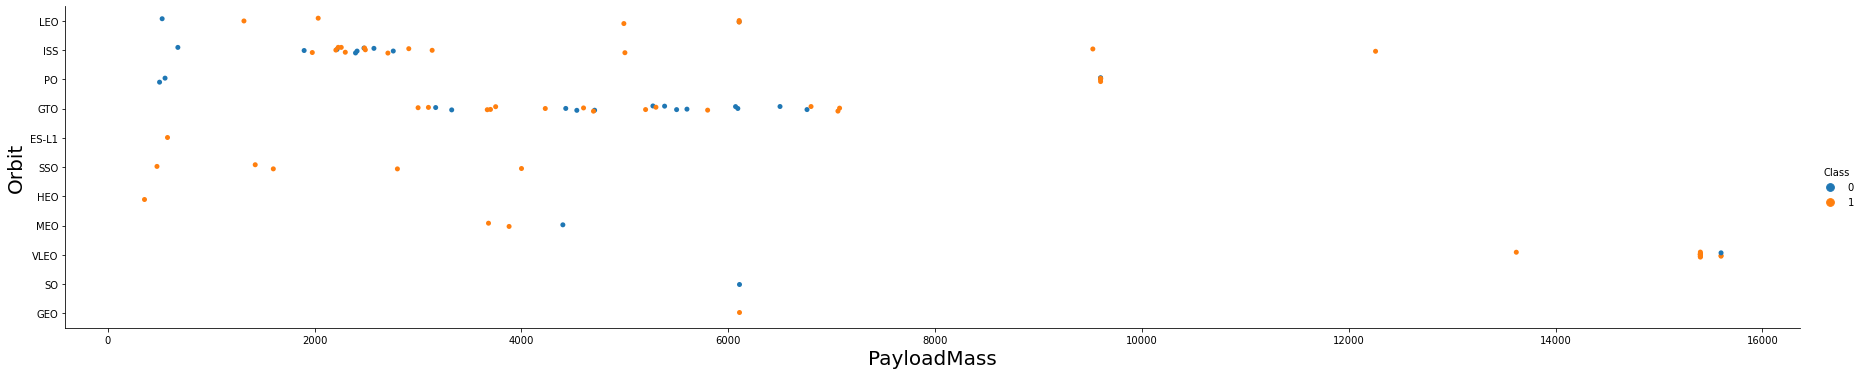

In [31]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.

### Visualize the launch success yearly trend

In [32]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

<AxesSubplot:ylabel='Class'>

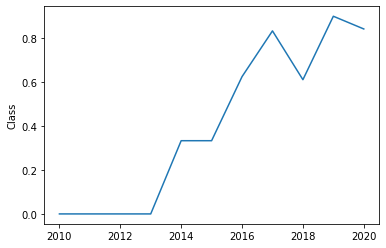

In [33]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = pd.DataFrame(Extract_year(df['Date'])).astype('int')
sns.lineplot(x = df['Year'].unique(), y = df.groupby(['Year'])['Class'].mean()) 

Sucess rate since 2013 kept increasing till 2020

## Features Engineering


In [34]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [35]:
features['LandingPad'].unique()

array([nan, '5e9e3032383ecb761634e7cb', '5e9e3032383ecb6bb234e7ca',
       '5e9e3032383ecb267a34e7c7', '5e9e3033383ecbb9e534e7cc',
       '5e9e3032383ecb554034e7c9'], dtype=object)

### Create dummy variables to categorical columns

In [36]:
features = pd.get_dummies(features, columns=['Orbit', 'LaunchSite','LandingPad','Serial'],drop_first=True)
features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Cast all numeric columns to 'float64'

In [37]:
features = features.astype('float64')
features.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
features.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

### Save

features_one_hot.to_csv('dataset_part\_3.csv', index=False)